## Business Objective

In this case study, BoomBikes, a US bike-sharing provider, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. To overcome this, they aim to develop a strategic business plan to boost revenue as the economy recovers. The company seeks to understand the factors influencing the demand for shared bikes post-quarantine. They have gathered a comprehensive dataset on daily bike demands and contracted a consulting firm to identify significant predictors of bike demand and how well these variables explain the demand patterns. The goal is to model the demand for shared bikes using available data, aiding BoomBikes in adjusting their business strategies to better meet customer needs and optimize market performance.

## Highlevel Steps for Regression

- Import Necessary Libraries
- Load the data
- Data Understanding
- Missing Value Check
- Check for Duplicate entries
- Data Cleaning
- Data Segmentation 
- Data Visualization
- Exploratory Data Analysis
- Data Preparation
- Split Dataset into Training and Testing Sets
- Rescale the variables
- Build the Linear model
- Residual Analysis of train data
- Make predictions using final model
- Model evaluation
- Hypothesis/Final Conclusions

In [300]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# train-test split
from sklearn.model_selection import train_test_split

# Statistical modeling and hypothesis testing
import statsmodels.api as sm

# VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# R squared value
from sklearn.metrics import r2_score

In [250]:
# Read CSV with dtype object using pandas library
bike_sharing = pd.read_csv('day.csv')

In [251]:
# Inspect the shape and details of the data
bike_sharing.shape

(730, 16)

In [252]:
bike_sharing.info(verbose=True)
bike_sharing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [253]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [254]:
# Checking for null/missing values
## percentage of missing values in each column
round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

###### Observation: No missing/NULL values in the Dataset

In [255]:
# Duplicate data check
bike_sharing_dup = bike_sharing.copy()

## Check for duplicates and drop the duplicate rows
bike_sharing_dup.drop_duplicates(subset=None, inplace=True)

In [256]:
bike_sharing_dup.shape

(730, 16)

###### Observation: No duplicate rows either in the Dataset

In [257]:
# Data Cleaning

## Checking value_counts() for entire dataframe. This will help to identify any unknown values in the dataset.
### NOTE: 'instant' column will have unique values. exclude from inference
bike_sharing_copy = bike_sharing.iloc[:,1:16]

for col in bike_sharing_copy:
    print(bike_sharing_copy[col].value_counts(ascending=False), '\n\n')
    

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 


1    499
0    231
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 


32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
   

###### Observation: No junk/unknown data either in the Dataset

In [258]:
# get the current columns
bike_sharing.columns

# Derived columns and Data segmentation

## Let's perform some data preperation
## 1. Drop instant column as it looks to be an index,let's also drop dteday as it has already been extracted into year and month columns
## 2. Based on the objective of the case study, we can also drop columns 'casual' and 'registered' as we atr not looking at the category of customers 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [259]:
# updated dataset
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bike_sharing = bike_sharing.drop(columns=columns_to_drop)

In [260]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [261]:
# Data segmentation
## Let's categorise the columns

# Numerical columns
num_cols = ['cnt', 'temp', 'hum', 'atemp', 'windspeed']

# Categorical data
cat_cols = ['season', 'yr', 'mnth', 'weekday' ,'workingday', 'weathersit','holiday']

In [262]:
# Data visualization
# Let's try to check if we are able to identify some correlation based on the visual data

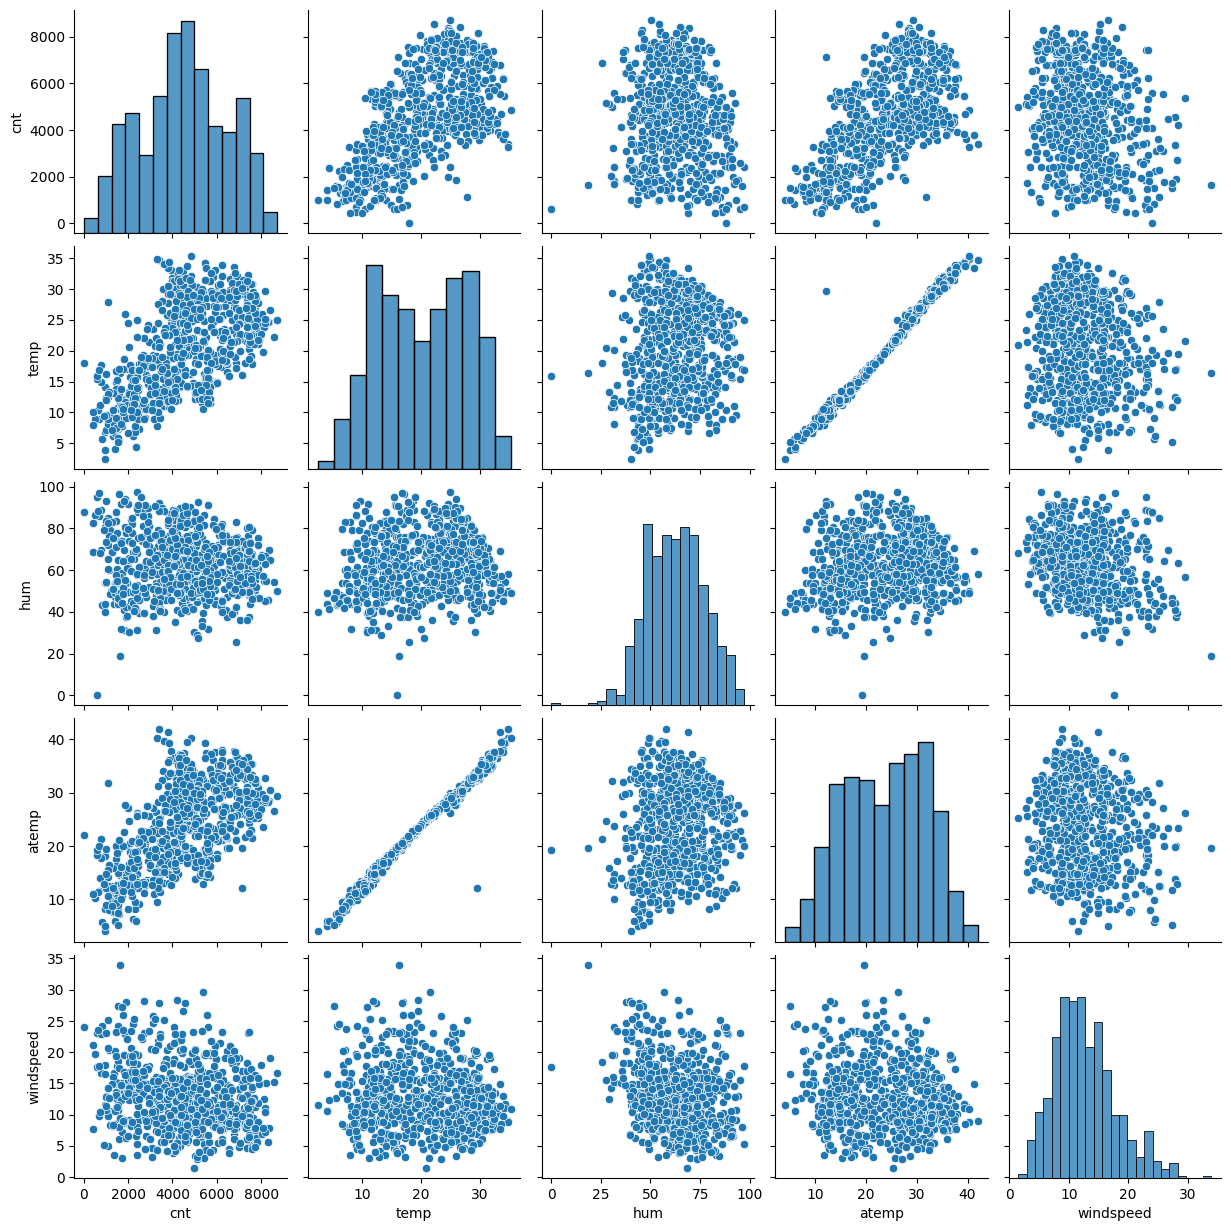

In [263]:
# run the pairplot for numberical columns
sns.pairplot(data = bike_sharing, vars=num_cols)
plt.show()

###### Observation: Linear model can be considered for atemp, temp as it shows positive correlation with 'cnt'

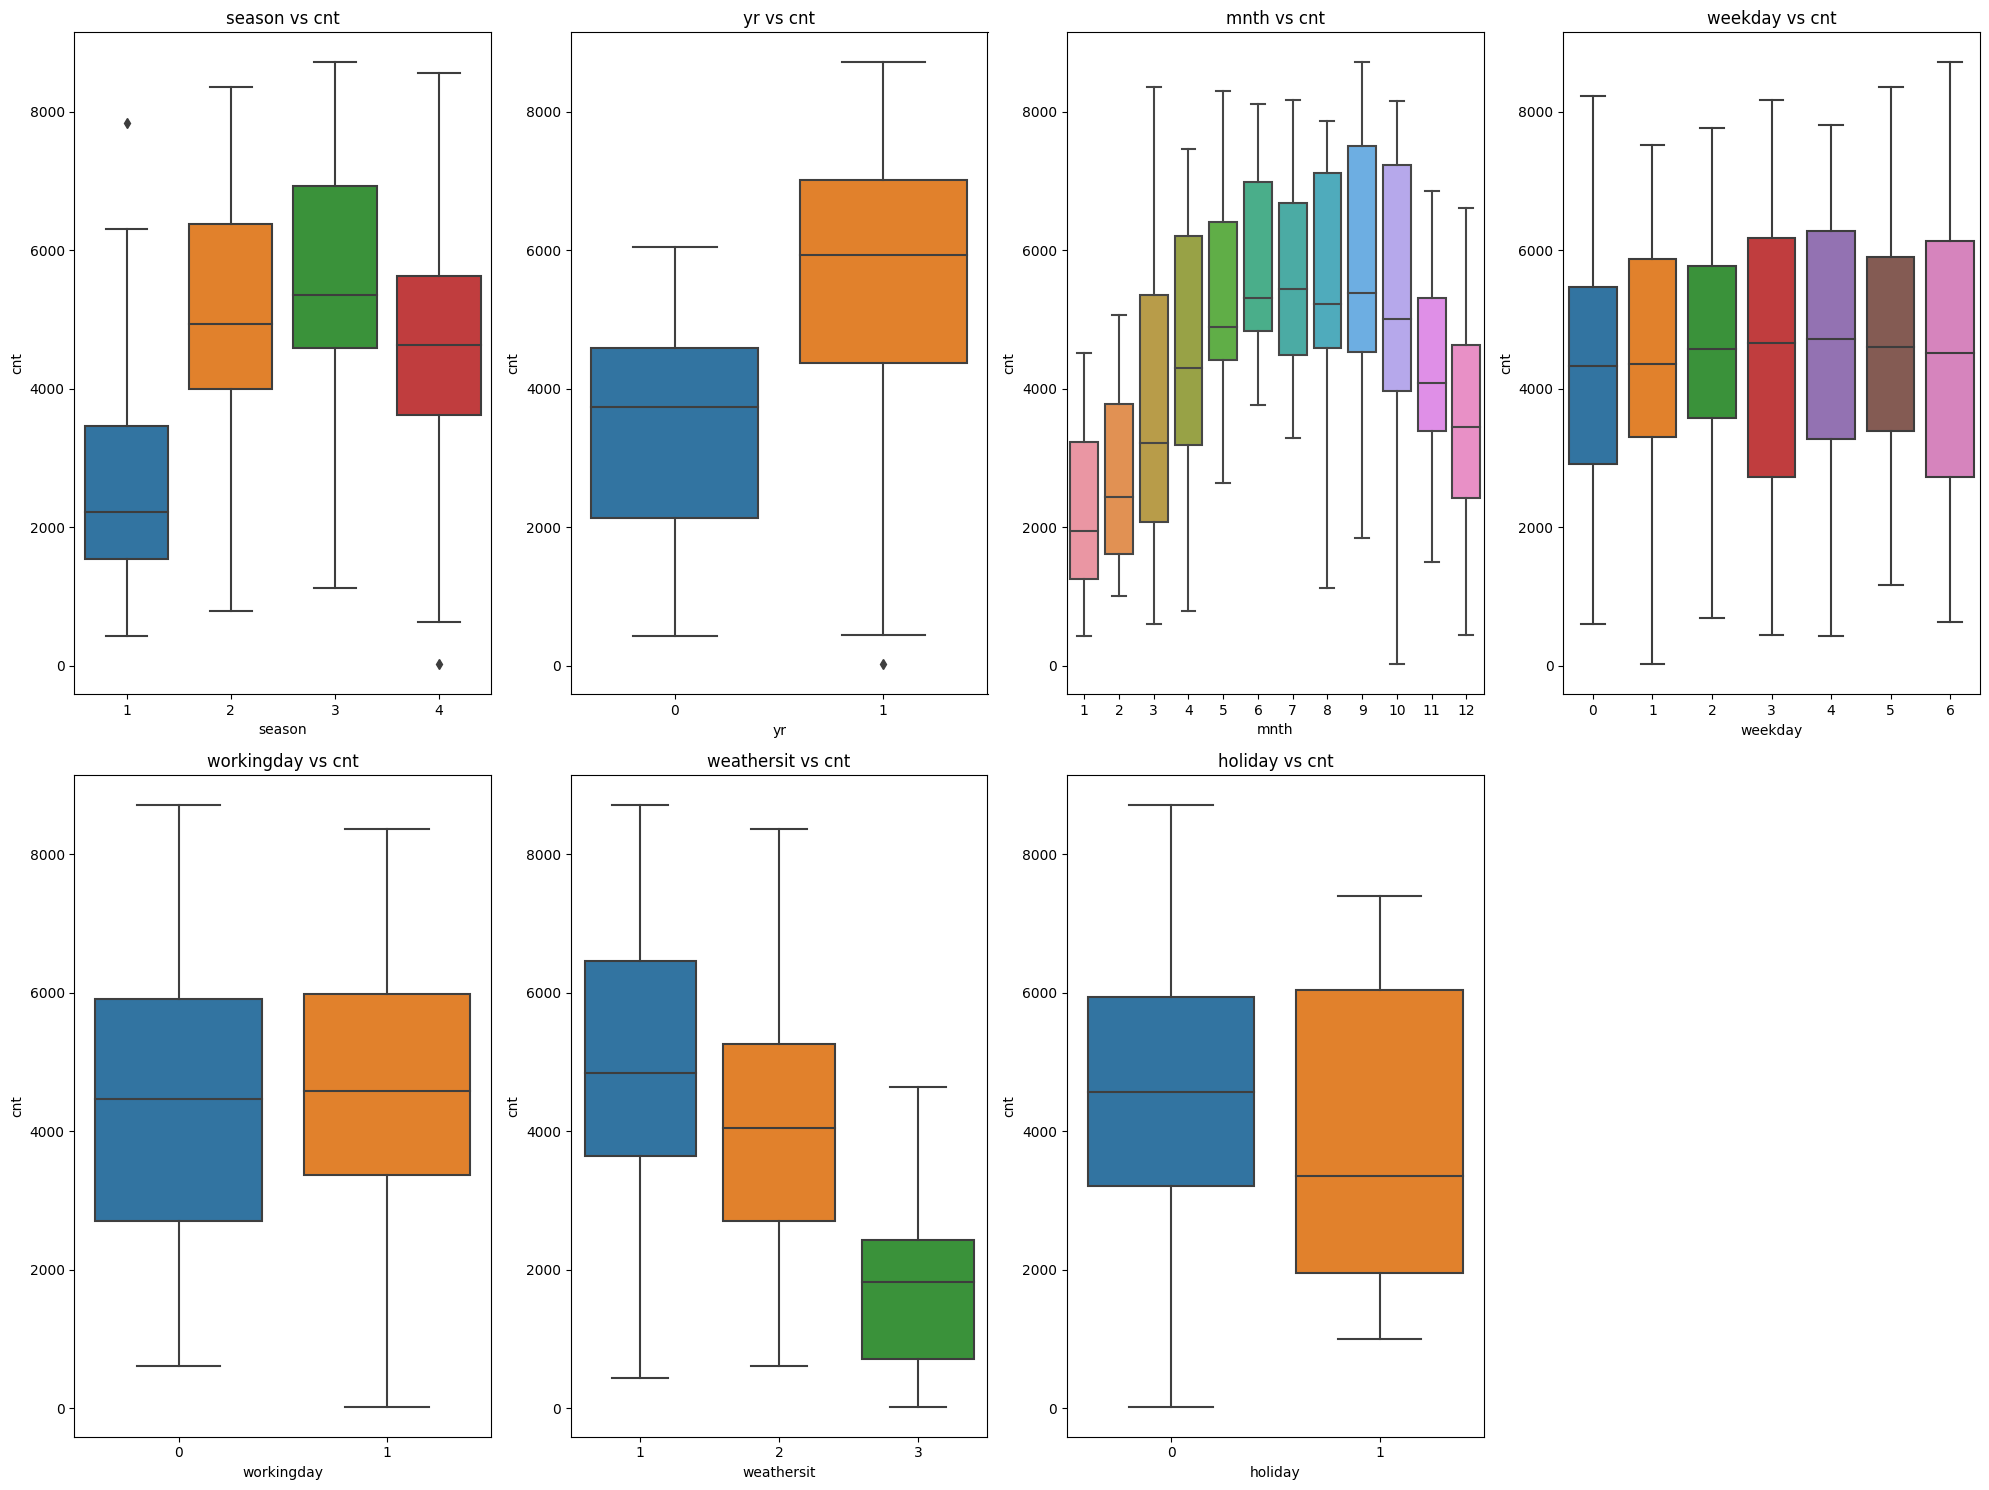

In [264]:
# Let's try to visualize for categorical variables
# using boxplot

# Create the figure
plt.figure(figsize=(20, 15))

# Loop through the categorical columns and create boxplots
for idx, col in enumerate(cat_cols, 1):
    plt.subplot(2, 4, idx)
    sns.boxplot(x=col, y='cnt', data=bike_sharing)
    plt.title(f'{col} vs cnt')

plt.tight_layout()
plt.show()

###### Observations: 
- The graph effectively illustrates the qualitative distributions of the data, boosting our confidence in the model's predictions when it highlights significant predictors.
- The demand for bikes remains fairly consistent throughout the week.
- During clear weather, the total user count typically falls between 4000 and 6000, averaging around 5500.
- Analyzing the seasons, category 3: Fall exhibits the highest median demand, whereas category 1: Spring shows the lowest.
- Fewer users are recorded during holidays.
- The year 2019 saw a higher user count compared to 2018.
- August experiences the highest bike demand of all the months.

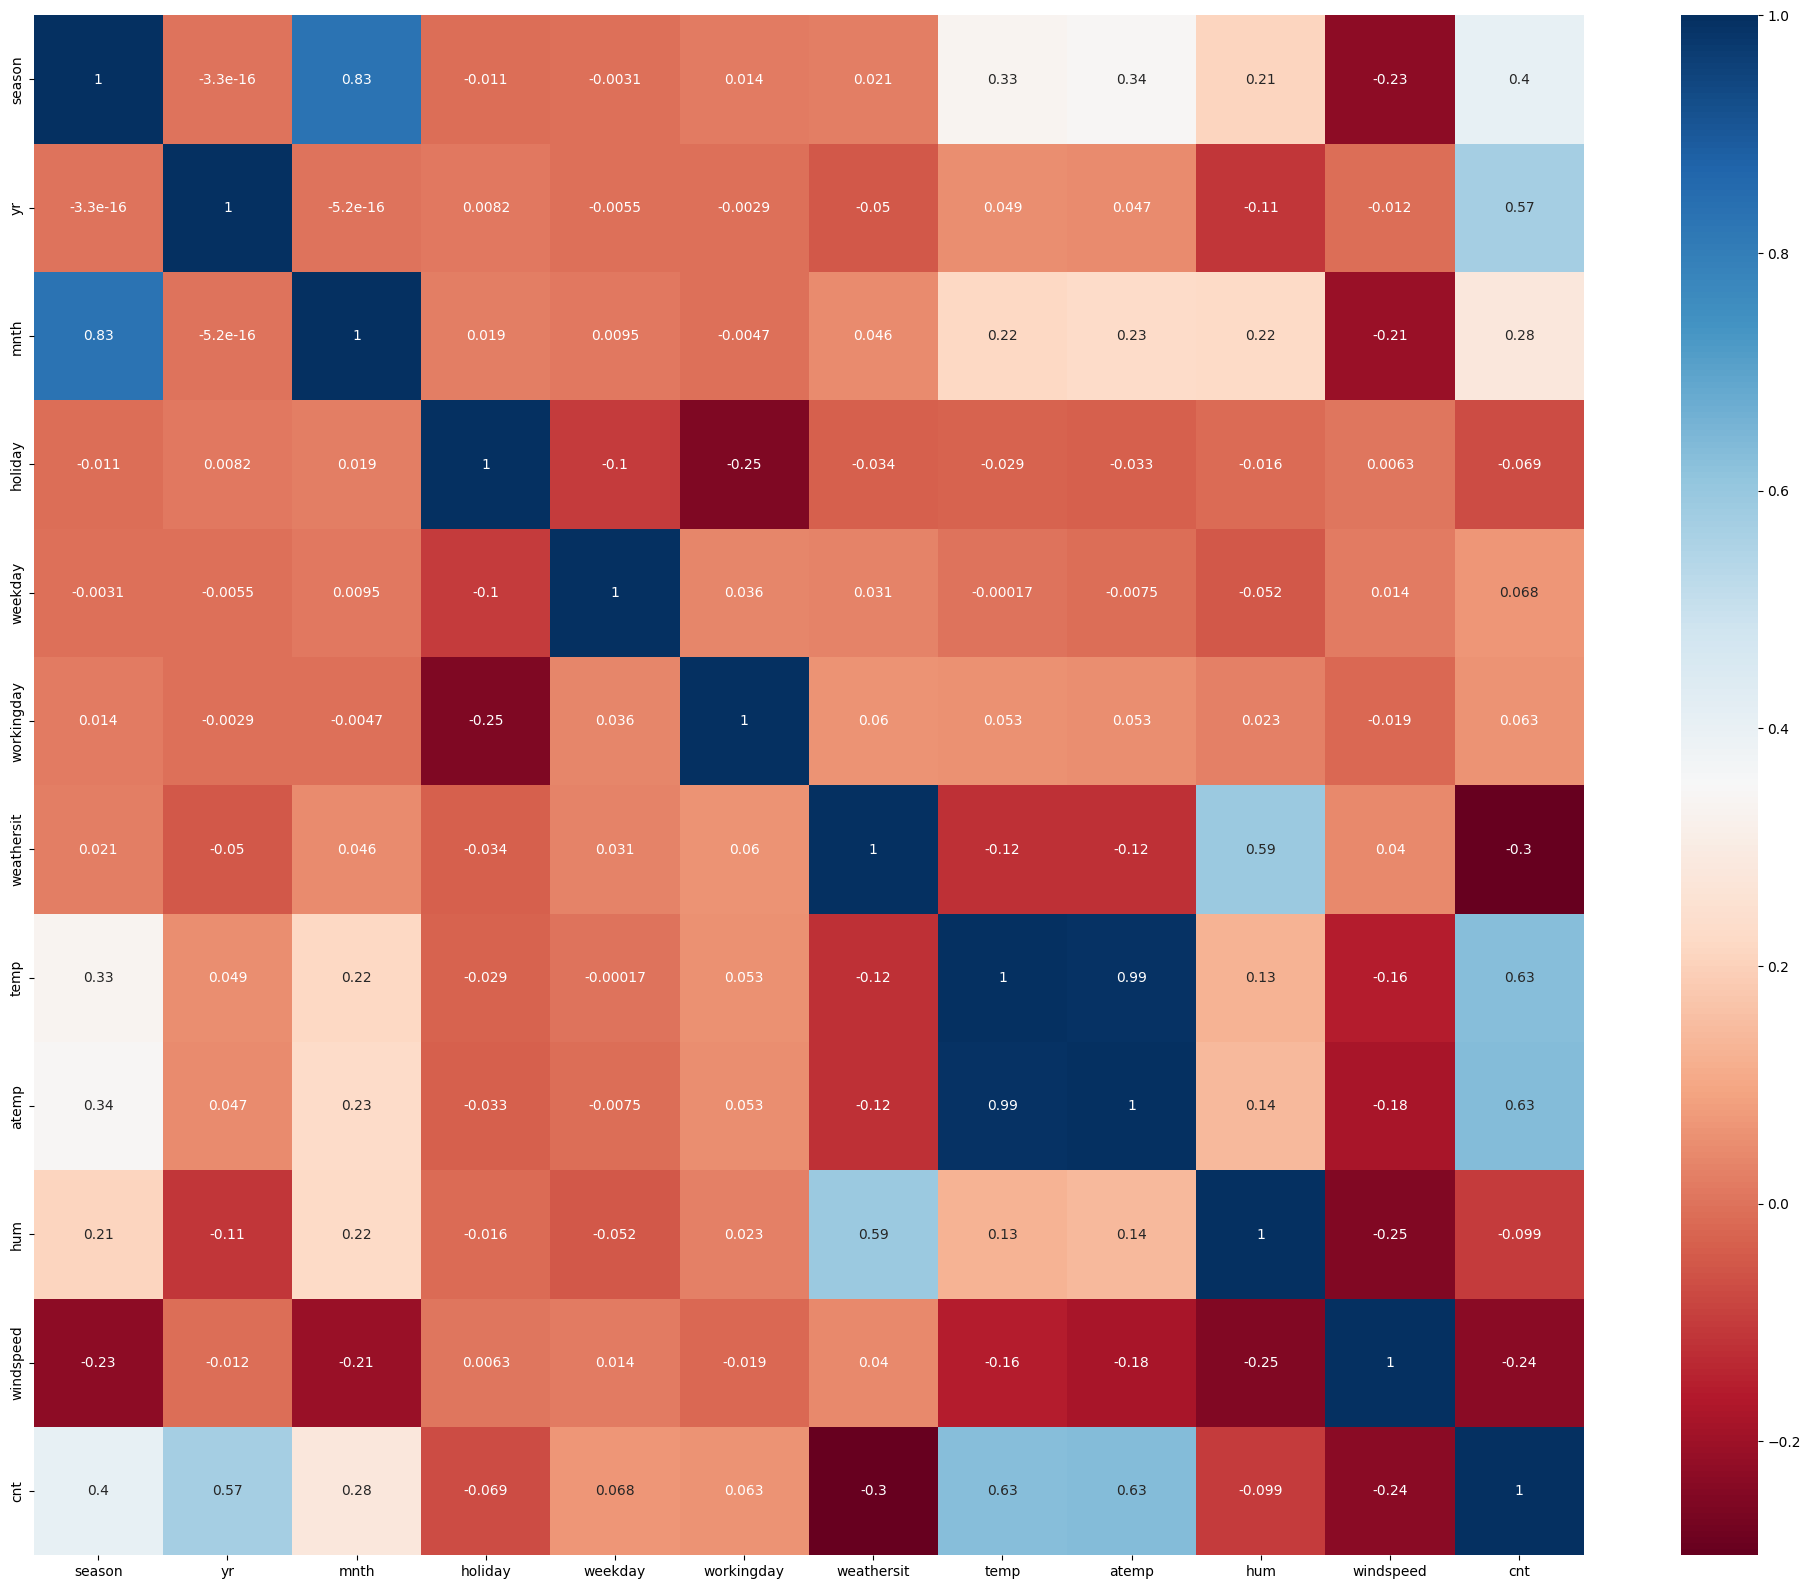

In [265]:
# Let's check the correlation matrix

plt.figure(figsize = (25,20))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="RdBu")
plt.show()

###### Observation:
The heatmap clearly highlights which variables are highly correlated with each other and which ones are strongly related to the target variable. We will use this map throughout the process of building the linear model to check and validate different correlated values along with the VIF and p-value. This will help us decide which variables to keep or remove from the model.

In [266]:
# Data Preperation

## Let's breakdown categical values further to derive further insights

## Mapping months
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x: calendar.month_abbr[x])

## Mapping seasons
bike_sharing.season = bike_sharing.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

# Mapping weathersit
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
#Mapping day of the week
bike_sharing.weekday = bike_sharing.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [267]:
# Let's inspect the new dataset
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [268]:
# Creating Dummy Variables

# The variables 'mnth', 'weekday', 'season', and 'weathersit' each encompass multiple categories. For example, 'weathersit' includes 3 distinct conditions, while 'mnth' spans across 12 months. To manage these categorical variables effectively, we will generate dummy variables. 

In [269]:
# Extract the categorical features 'season', 'mnth', 'weekday', and 'weathersit' and convert them into dummy variables.
dummy = bike_sharing[['season', 'mnth', 'weekday', 'weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True)

# Integrate the newly created dummy variables into the original dataset.
bike_sharing = pd.concat([dummy, bike_sharing], axis=1)

# drop the original columns
bike_sharing.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1, inplace=True)

# Checking the new dataframe
bike_sharing.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [270]:
bike_sharing.shape

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

In [271]:
# Split the Dataset into train-test split
train_data, test_data = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [272]:
# Train Dataset
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

In [273]:
# Test Dataset
test_data.shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 219 non-null    uint8  
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Aug                      219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Feb                      219 non-null    uint8  
 6   mnth_Jan                      219 non-null    uint8  
 7   mnth_Jul                      219 non-null    uint8  
 8   mnth_Jun                      219 non-null    uint8  
 9   mnth_Mar                      219 non-null    uint8  
 10  mnth_May                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Oct                      219 non-null    uint8  
 13  mnth

### Rescaling the features

Scaling does not significantly affect simple linear regression models but is crucial in multiple linear regression. For instance, 'cnt' values are much higher than 'temp', 'atemp', etc. Rescaling ensures comparable scales to prevent coefficients from being disproportionately large or small, which complicates model evaluation. Min-Max scaling is used here to standardize 'cnt', 'hum', 'windspeed', 'temp', and 'atemp' in the train dataset.

In [274]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']

train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
train_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


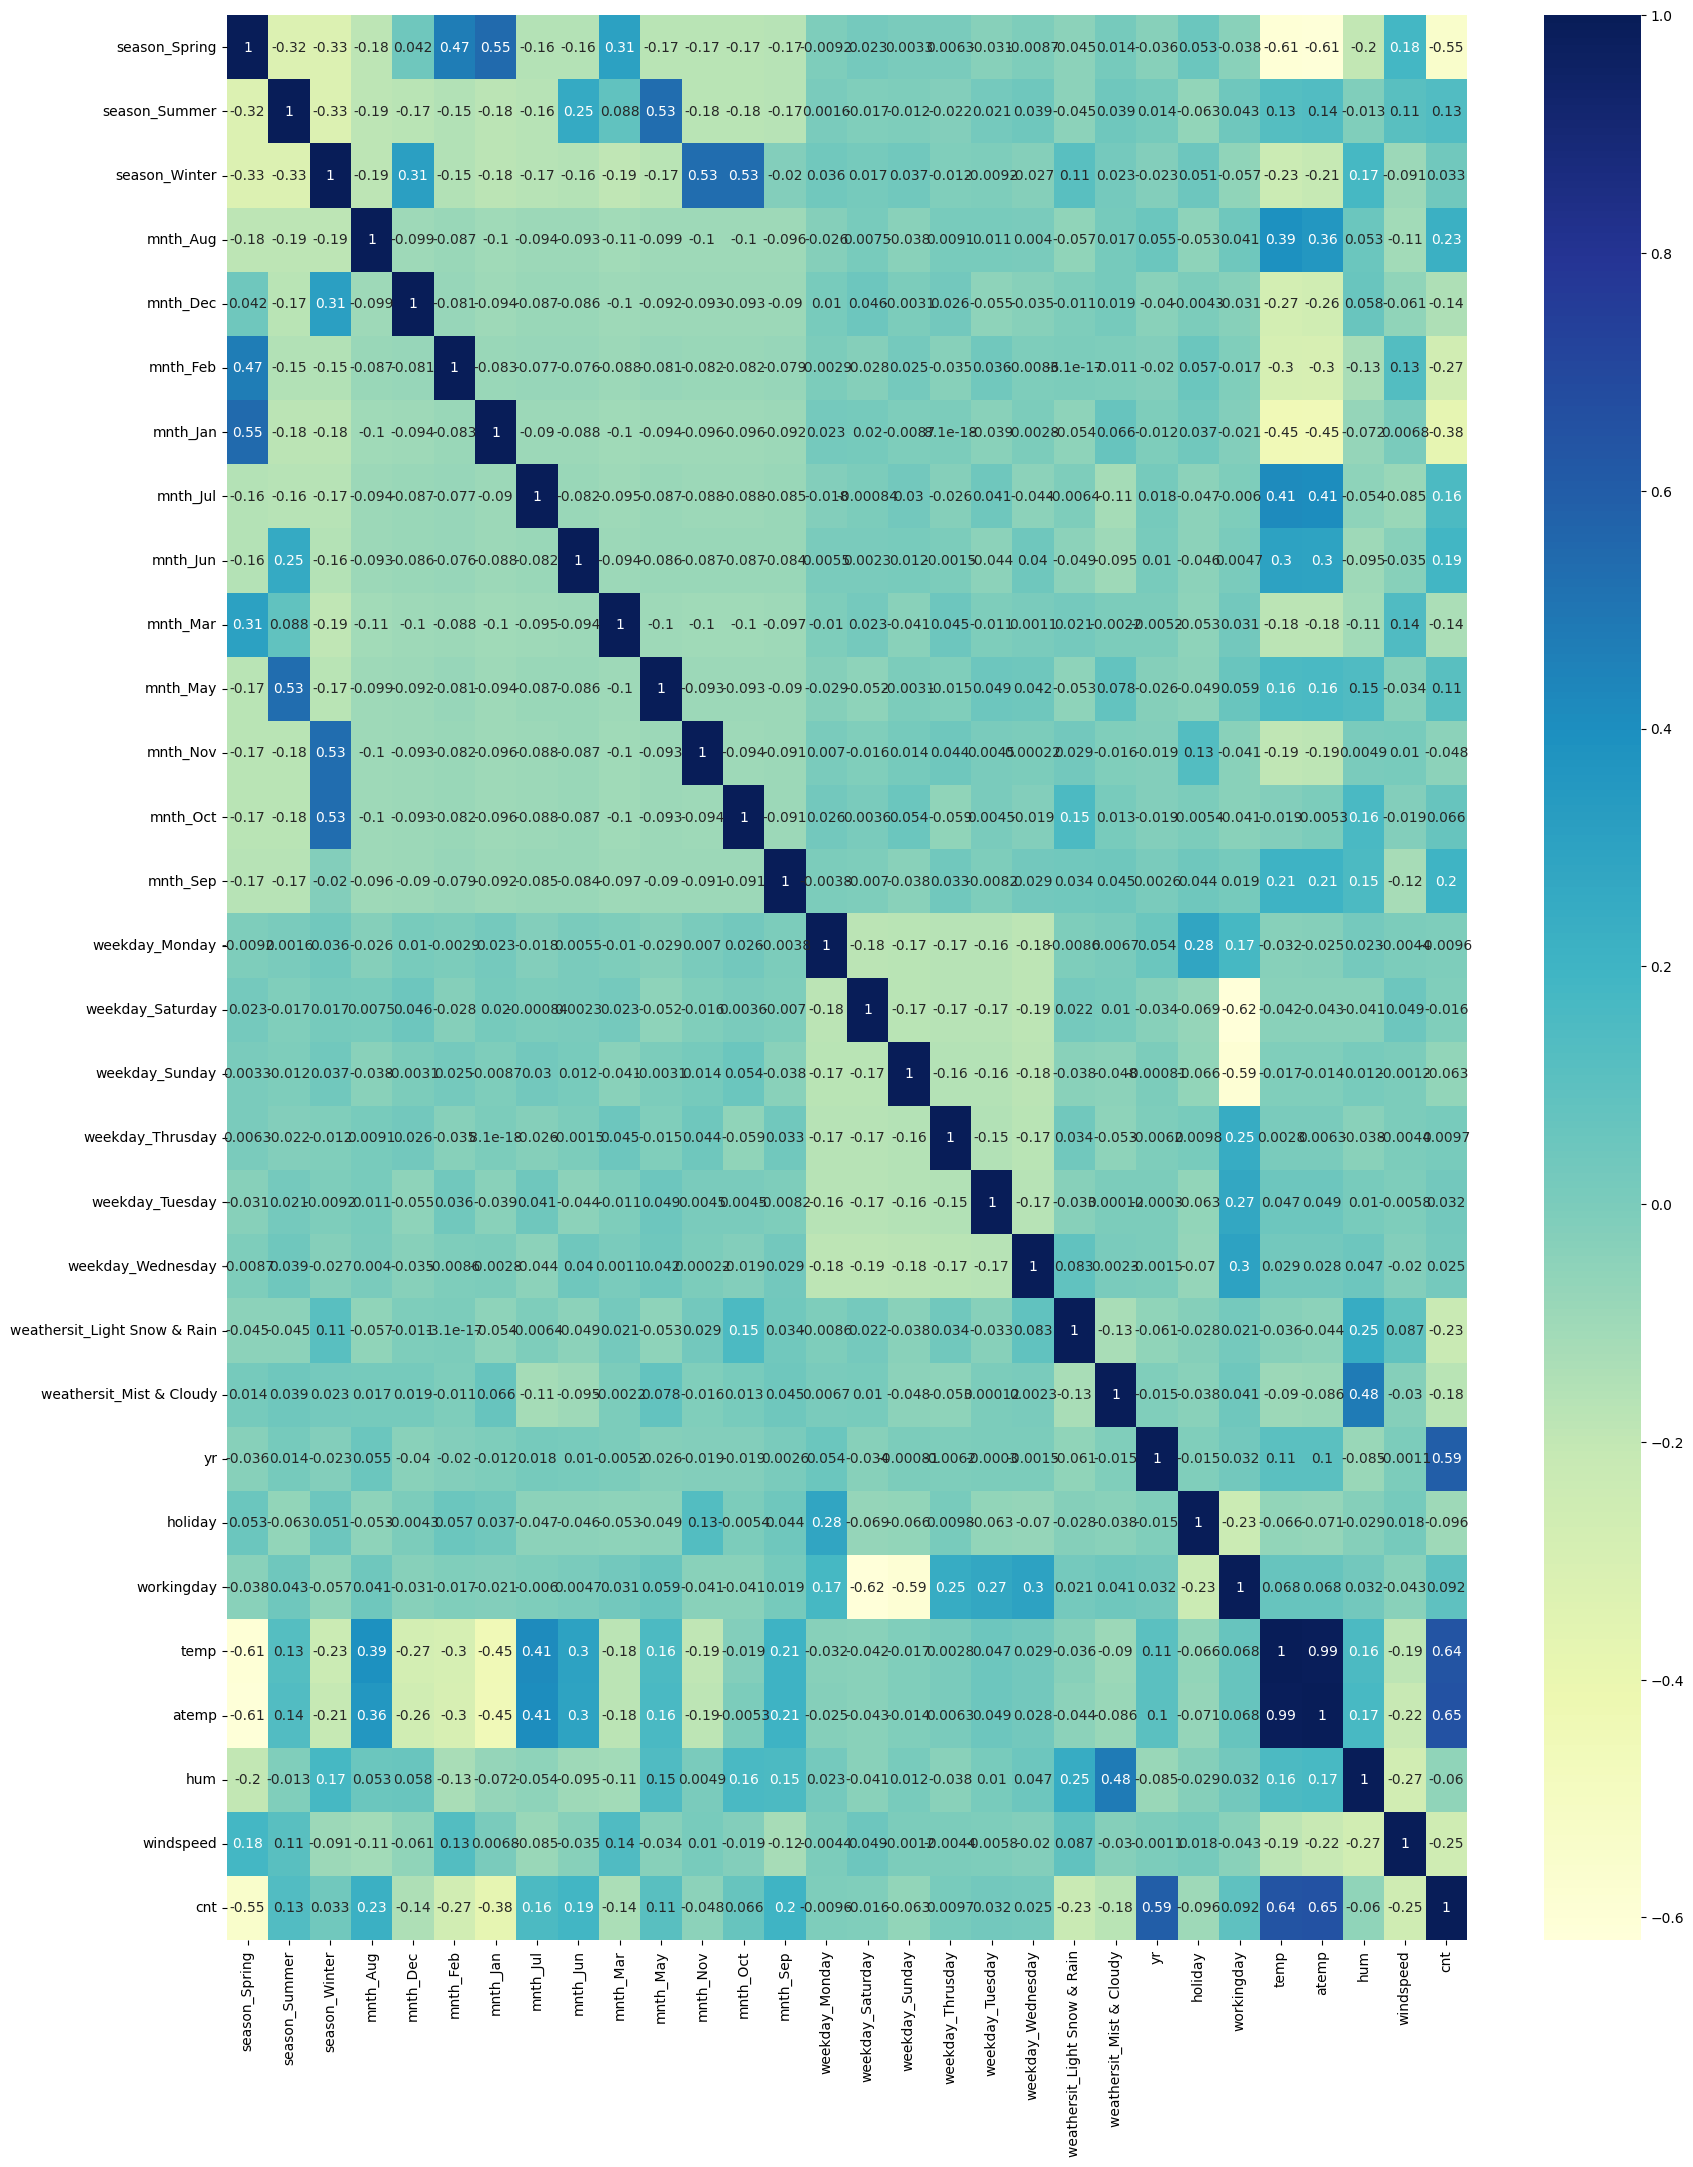

In [275]:
# Checking coefficients for correlation
plt.figure(figsize = (20, 25))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Observation:
The heatmap clearly highlights which variables are highly correlated with each other and which ones are strongly related to the target variable. We will use this map throughout the process of building the linear model to check and validate different correlated values along with the VIF and p-value. This will help us decide which variables to keep or remove from the model.

In [276]:
# Build the Linear Model

## Dividing into X and y sets for model building
y_train_data = train_data.pop('cnt')
X_train_data = train_data

##### Approach used
#### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [277]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with 15 variables
linear_mod = LinearRegression()
linear_mod.fit(X_train_data, y_train_data)

rfe = RFE(linear_mod, 15)             # running RFE
rfe = rfe.fit(X_train_data, y_train_data)

In [278]:
list(zip(X_train_data.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [279]:
col = X_train_data.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [280]:
X_train_data.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [281]:
## build model using statsmodel

### Create X_test datatframe with RFE selected variables
X_train_rfe = X_train_data[col]

In [282]:
## Adding a constant variable
### In statsmodels, we must explicitly add a constant using sm.add_constant(X). Without this step, statsmodels will, by default, fit a regression line that passes through the origin.

X_train_rfe = sm.add_constant(X_train_rfe)
### View the data
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [283]:
# run the linear model
lin_model_1 = sm.OLS(y_train_data,X_train_rfe).fit()

# Check the parameters obtained
lin_model_1.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
dtype: float64

In [284]:
# Summary of the model
print(lin_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          2.31e-191
Time:                        18:58:38   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###### Observation: 
The p-value for all variables is less than 0.05, so we retain all columns and proceed with the model.

#### Check VIF for multicollinearity

Variance Inflation Factor (VIF) provides a quantitative measure of how much the feature variables are correlated with each other. It is a crucial parameter for testing the robustness of our linear model. The formula for calculating VIF is:

VIF = 1 / 1 - R^2
Where R^2 is the coefficient of determination of the regression model.

In [285]:
# Calculate the VIFs for the model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


In [286]:
# Consider dropping variables that have VIF greater than 10 - iteration 2

# Drop `const` column as the vif is > 10
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [287]:
# Iteration 3
# Drop `hum` column high VIF
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


In [288]:
# NOTE: All the variables are under 10, so lets not further drop any additional features

In [289]:
# Final Model

## Add a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

## Create a fitted model
lin_model_2 = sm.OLS(y_train_data,X_train_lm).fit()

In [290]:
### View model summary
print(lin_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          7.33e-189
Time:                        18:58:38   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [291]:
# Calculate the VIFs for the model, again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


###### Observation:
All the variables have VIF value are under 10, we can finalise lin_model_2 as final model for making inferences

In [292]:
# Residual analysis
y_train_cnt = lin_model_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

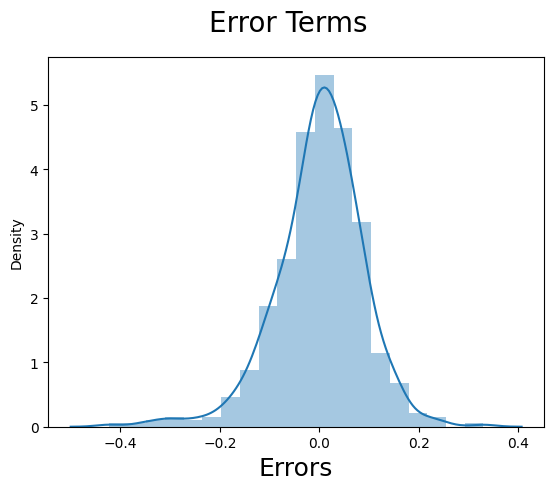

In [293]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_data - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###### Observation:
The error terms are centered around 0 and follow a normal distribution, aligning with the assumptions of linear regression.

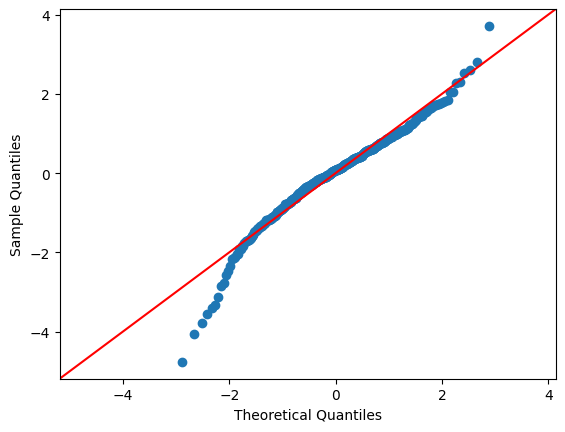

In [294]:
# Cross-verify with qq-plot

## Plot the qq-plot of the error terms
sm.qqplot((y_train_data - y_train_cnt), fit=True, line='45')
plt.show()

###### Observation:
Most data points lie on the straight line, indicating that the error terms are normally distributed.

### Making Predictions using Final Model
With the model fitted and the normality of the error terms confirmed, we can move on to making predictions using the final model. The next step is to apply scaling to the test set.

In [296]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test_data[num_vars] = scaler.transform(test_data[num_vars])

test_data.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [297]:
# Divide into X_test and y_test
y_test = test_data.pop('cnt')
X_test = test_data

## Add a constant variable
X_test = sm.add_constant(X_test)

In [298]:
# Predict values used by final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
## Add constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weekday_Saturday              219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  temp

In [299]:
y_predict = lin_model_2.predict(X_test)

### Calculate R-squared value
R-squared is a measure of how well the linear regression model fits the data. It represents the percentage of variance in the dependent variable that is collectively explained by the independent variables. R-squared indicates the strength of the relationship between the model and the dependent variable, expressed on a 0 to 100% scale.

In [303]:
r2_score(y_test, y_predict)

0.8045478865351157

###### Observation:
The R-squared value for this model is 0.8045, which means that approximately 80.45% of the variance in the dependent variable is explained by the independent variables in the model.

## Model Evaluation

Text(0, 0.5, 'y_predict')

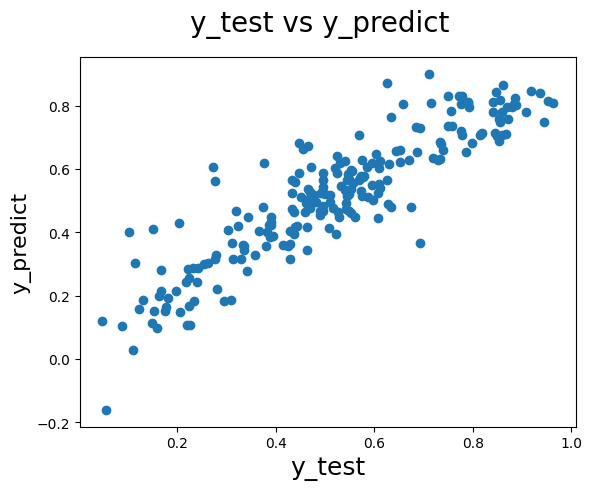

In [307]:
# Plot a graph for actual vs predicted values
fig = plt.figure()
plt.scatter(y_test, y_predict)
fig.suptitle('y_test vs y_predict', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_predict', fontsize = 16)

###### Observation:
We can determine that the final model fit is not random and demonstrates good predictive power.

In [308]:
# Retrieving the variable names and coefficient values for the final equation of the best-fit line
val = pd.DataFrame(lin_model_2.params)
val.insert(0,'Variables',val.index)
val.rename(columns = {0:'Coefficient value'},inplace = True)
val['index'] = list(range(0,15))
val.set_index('index',inplace = True)
val.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
val

,Variables,Coefficient value
index,,
13,temp,0.472823
10,yr,0.234361
0,const,0.173663
3,season_Winter,0.079699
6,mnth_Sep,0.075318
7,weekday_Saturday,0.058434
12,workingday,0.046502
2,season_Summer,0.043352
4,mnth_Jan,-0.038947


### Fitted Equation for the model

The equation for the best-fit line (linear regression model) can be constructed as follows:
cnt = 0.173663 + 0.472823 * temp + 0.234361 * yr + 0.079699  * season_Winter + 0.075318  * mnth_Sep + 0.058434  * weekday_Saturday + 0.046502  * workingday + 0.043352  * season_Summer - 0.038947  * mnth_Jan - 0.048222  * mnth_Jul - 0.056199  * holiday - 0.059704  * season_Spring - 0.082621  * weathersit_Mist & Cloudy - 0.156264  * windspeed - 0.291727  * weathersit_Light Snow & Rain

Here we can conclude that the variables temperature, season or weather situation and month are the significant factors affecting the bike sales

## Recommendations based on the analysis

1. **Temperature**: Increase bike availability during warmer seasons as higher temperatures significantly boost bike demand.
2. **Year**: The upward trend in bike rentals from 2018 to 2019 suggests continued expansion and improvement of services.
3. **Seasonal Effects**: Focus marketing efforts and increase bike availability in Winter and Summer, while promoting special deals in Spring.
4. **Month**: Prepare for higher demand in September and implement promotions in January and July to balance seasonal fluctuations.
5. **Weather Conditions**: Adjust bike availability and marketing strategies based on weather forecasts, offering incentives during adverse conditions to sustain demand.